#### Iris Flower Classification


##### Importing Necessary Libraries

In [61]:
#import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

import warnings
warnings.filterwarnings('ignore')



![Iris Flower](images/Iris_flower.jpg)


In [62]:
#Load Dataset
df=pd.read_csv('Iris.csv')
df.head(10)# Map species to numeric labels
df['target'] = df['Species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})

df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [63]:
#check species of Flowers on Iris_Flower Dataset
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [64]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [65]:
#check the null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
target           0
dtype: int64

In [66]:
le=LabelEncoder()
df['target']=le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


### EDA
##### pairplot

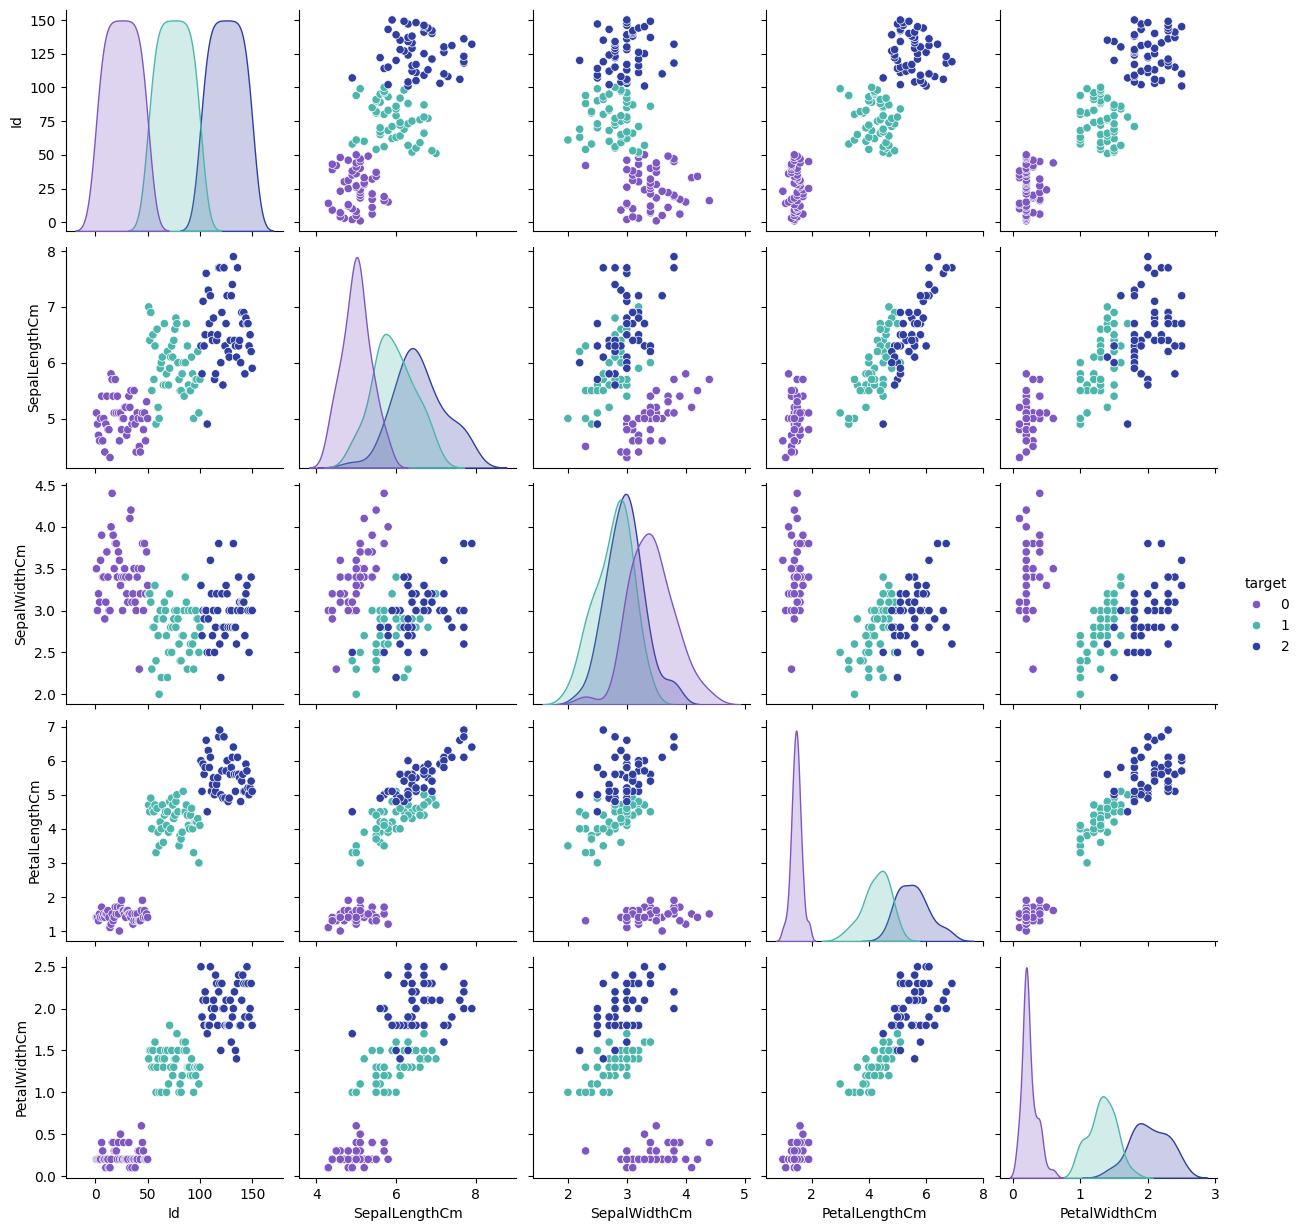

In [67]:


colors = ['#7E57C2', '#4DB6AC', '#303F9F']

# Map target numbers to colors
palette = dict(zip(df['target'].unique(), colors))

sns.pairplot(df, hue='target', palette=palette)


##### correlation

In [68]:
numerical_columns = df.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()
correlation_matrix

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


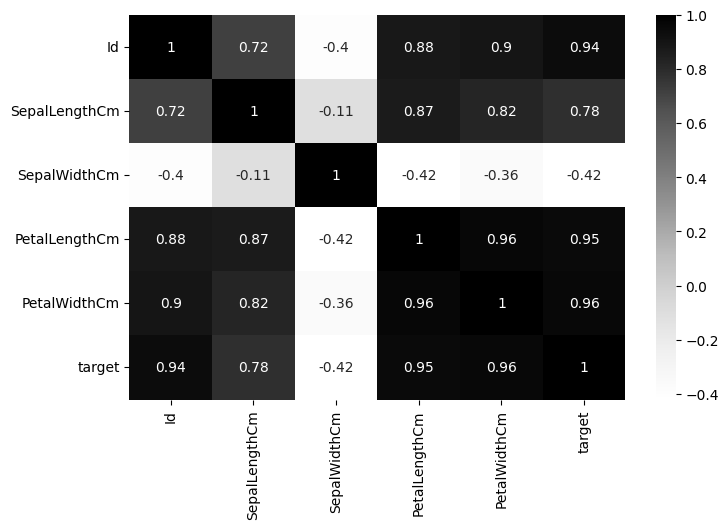

In [69]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix,annot=True,cmap='Greys')
plt.show()

In [70]:
df.duplicated().sum()

np.int64(0)

In [71]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


#### outliners

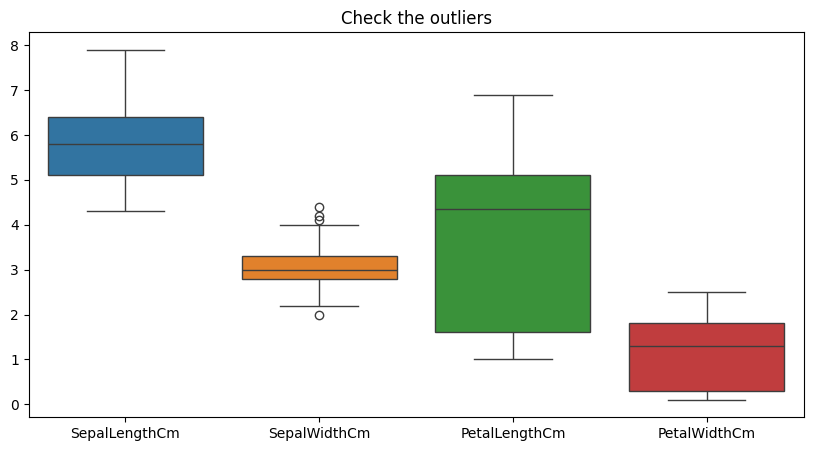

In [72]:


plt.figure(figsize=(10,5))
sns.boxplot(data=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
plt.title('Check the outliers')
plt.show()


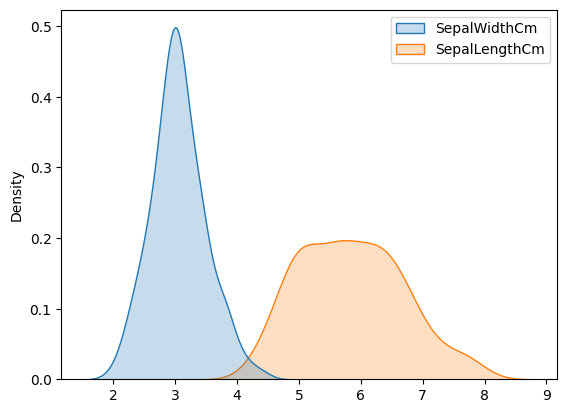

In [73]:
sns.kdeplot(df[['SepalWidthCm', 'SepalLengthCm']] , fill=True)
plt.show()

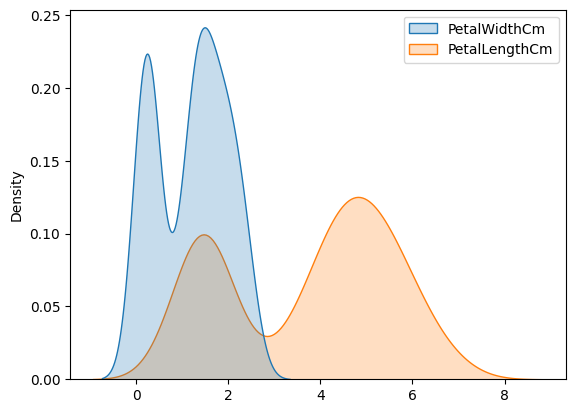

In [74]:
sns.kdeplot(df[['PetalWidthCm', 'PetalLengthCm']], fill=True)
plt.show()

#### Model

In [75]:
x=df.drop(['Species'],axis=1)
y=df['Species']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
#logistic Regression
lr=LogisticRegression()
model=lr.fit(x_train,y_train)

In [ ]:
#prediction
y_pred=model.predict(x_test)

In [ ]:
#calculate accuracy
print(f'accuracy score: {accuracy_score(y_test,y_pred)}')

accuracy score: 1.0


In [ ]:
#show classification report
print(f'classification report: {classification_report(y_test,y_pred)}')

classification report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

